<b>Аналитика в авиакомпании</b>

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.
Для этих двух наборов данных нужно:
1. Импортировать файлы;
2. Изучить данные в них;
3. Проверить типы данных на корректность;
4. Выбрать топ-10 городов по количеству рейсов;
5. Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
6. Сделать выводы по каждому из графиков, пояснить результат.

<b>Загрузим данные и выведем информацию по каждому датасету.</b>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

In [4]:
font = {'family': 'sans-serif',
        'color':  '#a72693',
        'weight': 'normal',
        'size': 20,
        }

In [5]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
models_and_flights_amount = pd.read_csv('/datasets/query_1.csv')
models_and_flights_amount.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [7]:
models_and_flights_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [8]:
city_and_average_flights = pd.read_csv('/datasets/query_3.csv')
city_and_average_flights.sample(10)

,city,average_flights
60,Оренбург,5.00
73,Советский,9.00
30,Когалым,3.16
74,Сочи,9.61
21,Иваново,1.00
49,Нефтеюганск,1.00
97,Элиста,4.87
34,Курган,3.42
72,Саратов,4.00
35,Курск,2.29


In [9]:
city_and_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [10]:
city_and_average_flights_plot = city_and_average_flights.sort_values(by='average_flights', ascending=False).head(10)
city_and_average_flights_plot

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


In [11]:
model_and_flights_amount_plot = models_and_flights_amount.sort_values(by='flights_amount', ascending=False).head(10)
model_and_flights_amount_plot

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


<b>Нарисуем графики по:  
    1. Моделям самолетов и количеству рейсов на них.  
    2. Городам и среднему количеству рейсов из них.</b>
Сделаем выводы.

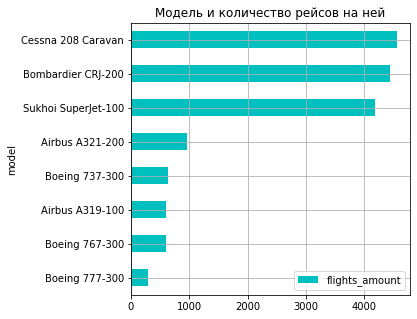

In [14]:
model_and_flights_amount_plot.sort_values(by='flights_amount').\
    plot(x='model', y='flights_amount', kind='barh', grid=True, figsize=(5, 5),\
    title='Модель и количество рейсов на ней', color='c')

<b>Вывод</b>  
Лидируют с большим отрывом 3 модели: Сессна 208, Бомбардье 200 и Сухой 100. 

Cessna 208B Grand Caravan EX — многофункциональный одномоторный самолёт. Благодаря своим уникальным характеристикам имеет успех в эксплуатации на местных и региональных авиалиниях, используется для специальных задач, таких как мониторинг местности, аэрофотосъёмка, выброска парашютистов.
Информация с сайта jettransfer.ru. Становится вполне понятна популярность данного самолета.

Bombardier CRJ-200 - это современный реактивный узкофюзеляжный самолет. Этот лайнер может выполнять рейсы в сложных метеоусловиях, что немаловажно в суровых зимних условиях России. Салон вмещает в себя 50 удобных кожаных кресел. Canadair Regional Jet (CRJ 200) подойдет для перелета группы людей до 50 пассажиров для перелетов внутри страны. Данный тип самолета подойдет для организации перелета групп шоу бизнеса, корпоративные перевозки, фахтовые перевозки, музыкальные группы и др.
Т.е. вполне может использоваться для чартерных рейсов и в жестких условиях Сибири и Дальнего Востока.

Сухой СуперДжет - это имя говорит само за себя. За короткое время данный самолет стал известен в России и за рубежом.

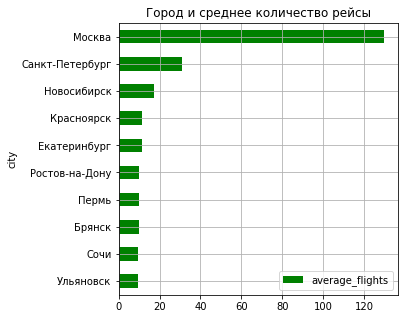

In [13]:
city_and_average_flights_plot.sort_values(by='average_flights').\
    plot(x='city', y='average_flights', kind='barh', grid=True, figsize=(5, 5),\
    title='Город и среднее количество рейсы', color='g')

<b>Вывод</b>  
Москва самый крупный транспортный узел в России. Не удивительно, что Москва лидирует. Далее следуют Санкт-Петербург и Новосибирск.

Вроде все )